In [2]:
import pandas as pd

df = pd.read_csv('data_xiang/xiangdousufiltered.smi',encoding = 'utf-8')
#df.drop_duplicates(keep='first', inplace=True) #去重
df = df.sample(frac=1.0)
cut_idx = int(round(0.5 * df.shape[0]))
print(cut_idx)
df_test, df_train = df.iloc[:cut_idx], df.iloc[cut_idx:]


df_test.to_csv(r"data_xiang/xiang_train.smi", index=None) #勉强可以，但是最前面一行会有数字
df_train.to_csv(r"data_xiang/xiang_test.smi", index=None)

6916


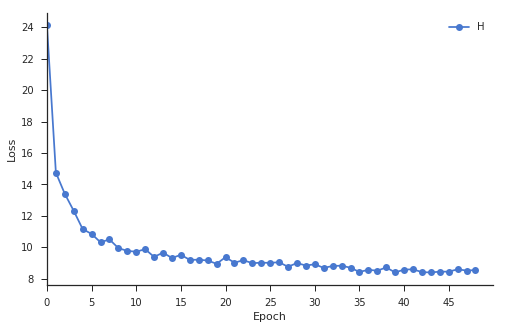

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
df = pd.read_csv( 'data_huang/loss-vaild.csv',header=None)

sns.set(style="ticks", palette="muted", color_codes=True)     #set( )设置主题，调色板更常用  
df.columns = ["loss","vaild_percent", "generatedcnt"]

loss = []
# dfloss = df.loss.data
# dfpercent = df.vaild_percent.data
for i,m in enumerate(df.loss):
    if i % 3 == 0:
        loss.append(m)

plt.figure(figsize=(8, 5))


plt.plot(loss ,'bo-') 

plt.legend((u'Huangtong'),loc='best')
plt.xlabel('Epoch')  
plt.ylabel('Loss')  

# plt.title('Train Loss')
plt.xticks(np.arange(0, 50,5))
plt.xlim(0,50)
sns.despine()
#plt.plot(df.vaild_percent)
#plt.plot(df.generatedcnt)
plt.show()
# print(df.vaild_percent[:5])

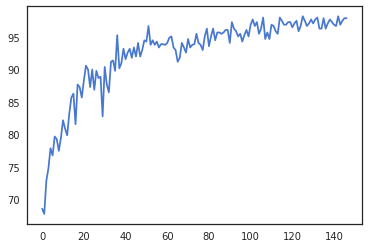

In [6]:
plt.plot(df.vaild_percent)
plt.show()

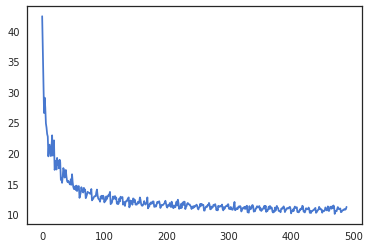

0    55.7
1    55.9
2    55.1
3    52.1
4    52.5
Name: vaild_percent, dtype: float64


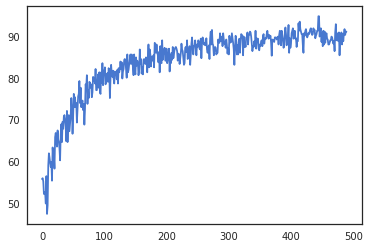

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
df = pd.read_csv( 'data_xiang/loss-vaild.csv',header=None)

sns.set(style="white", palette="muted", color_codes=True)     #set( )设置主题，调色板更常用  
df.columns = ["loss","vaild_percent", "generatedcnt"]

plt.plot(df.loss)  
#plt.plot(df.vaild_percent)
#plt.plot(df.generatedcnt)
plt.show()
print(df.vaild_percent[:5])
plt.plot(df.vaild_percent)
plt.show()

In [1]:
from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem import AllChem
from rdkit import DataStructs

lines = Chem.SmilesMolSupplier('data_huang/filtered21882.smi')
sub = Chem.MolFromMolFile('data_huang/huangtong.mol')

mols = [x for x in lines]

len(mols)


21881

In [2]:
sublist = []
for index, mol in enumerate(lines):
    if mol:
        if mol.HasSubstructMatch(sub):
            sublist.append(index)

19386
[0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 21]


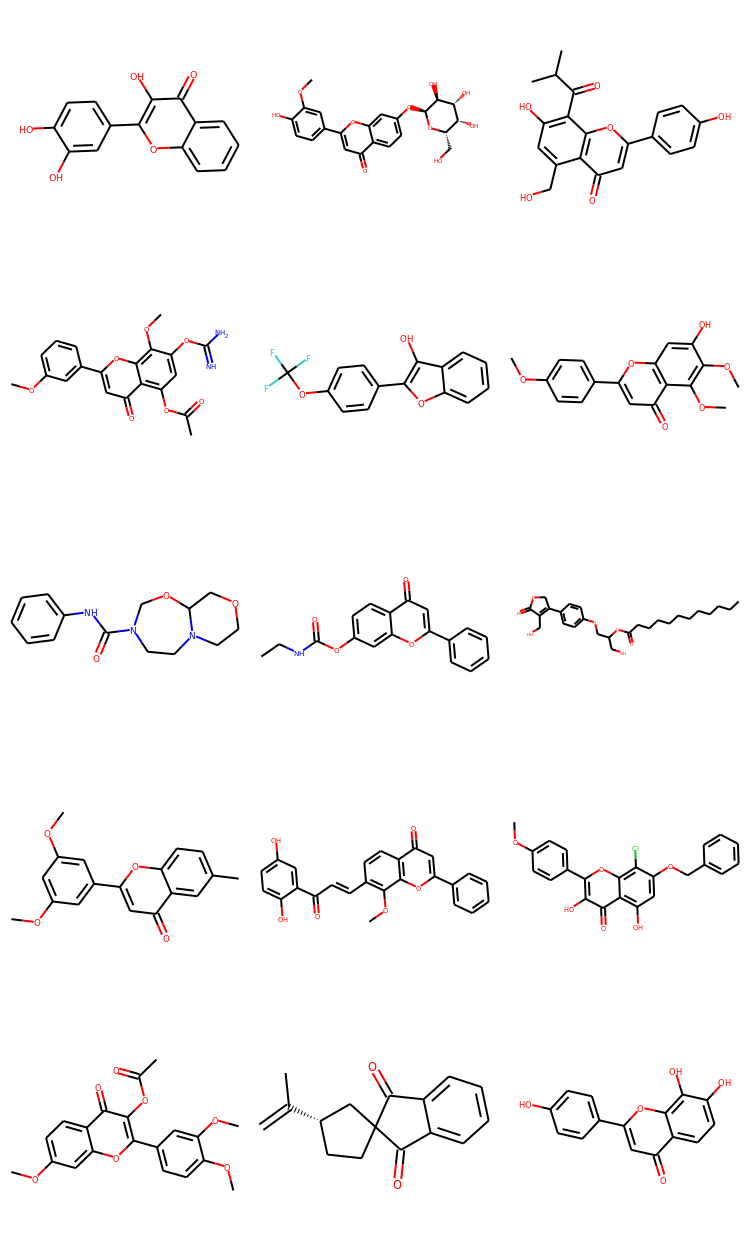

In [11]:
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
print(len(sublist))

AllChem.Compute2DCoords(sub)
Draw.MolToImage(sub)

# line8 = [x for x in mols[:] if x is not None]
for m in mols[:15]: tmp= AllChem.Compute2DCoords(m)


print(sublist[:15])
Draw.MolsToGridImage(mols[:15],molsPerRow=3,subImgSize=(250,250))

In [2]:
from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem import AllChem
from rdkit import DataStructs
lines_filter = Chem.SmilesMolSupplier('data/unique-cano-nature product.smi')
sub = Chem.MolFromMolFile('data_huang/huangtong.mol')

mols = [x for x in lines_filter]
print(len(mols))



118766


In [3]:
subxiang = Chem.MolFromMolFile('data_xiang/xiangdousu.mol')
subxiang_filter = []
for i, mol in enumerate(lines_filter):
    if mol.HasSubstructMatch(subxiang):
        subxiang_filter.append(i)
print(len(subxiang_filter))

subhuang_filter = []
for j, molk in enumerate(lines_filter):
    if molk.HasSubstructMatch(sub):
        subhuang_filter.append(j)
        
print(len(subhuang_filter))


2166
4183


In [4]:
linespp = []
for i,mol in enumerate(lines_filter):
    if i not in subhuang_filter and i not in subxiang_filter:
        linespp.append(mol)
len(linespp)    



112418

In [9]:
smiles_list = []
for i, line in enumerate(linespp):
    if i % 10000 == 0:
        print("{} lines processed.".format(i))
    smiles_list.append(Chem.MolToSmiles(line,isomericSmiles=True))

0 lines processed.
10000 lines processed.
20000 lines processed.
30000 lines processed.
40000 lines processed.
50000 lines processed.
60000 lines processed.
70000 lines processed.
80000 lines processed.
90000 lines processed.
100000 lines processed.
110000 lines processed.


In [10]:
with open('nature_out2kind.smi', 'w') as f:
        for smiles in smiles_list:
            f.write(smiles + "\n")

In [15]:
sublist_filter = []
for i, mol1 in enumerate(lines_filter):
    if mol1.HasSubstructMatch(sub):
        sublist_filter.append(mol1)

len(sublist_filter)

4183

In [20]:
sethuang = set(sublist_filter)
setxiang = set(subxiang_filter)
setall = set(lines_filter)

setout = setall - setxiang
print(len(list(setout)))

118766


In [23]:
len(subxiang_filter)

6349

In [28]:
print(subxiang_filter[0])

In [ ]:
with open('filteredhuangandxiang.smi', 'w') as f:
        
        for i, line in enumerate(list(set3)):
            f.write(line + '')

/home/zhengsj/.conda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


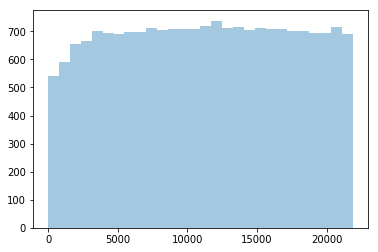

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# plt.plot(sublist)
sns.distplot(sublist, kde=False)
plt.show()